# FlipItNews-NLP

- FlipItNews, a Gurugram-based company, is dedicated to transforming the way Indians engage with finance, business, and capital market investments by leveraging the power of artificial intelligence (AI) and machine learning (ML). 
- Their mission is to enhance financial literacy among millennials and first-time investors through smart content discovery and contextual peer engagement. To support this vision, the company has accumulated a large repository of news articles covering a range of topics. 
- This project focuses on utilizing natural language processing (NLP) techniques to analyze and categorize these news articles into distinct categories such as politics, technology, sports, business, and entertainment. By automating the classification process, FlipItNews aims to streamline content delivery and improve user experience in accessing relevant financial and business information.

### Objective:

The goal of this project is to build and compare at least three NLP-based machine learning models to automatically classify news articles into relevant categories. This will help FlipItNews deliver more personalized and relevant content to users, enhancing their engagement and financial understanding.

## Dataset Information:

### Dataset: 
[Download the dataset here](https://drive.google.com/file/d/1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u/view)


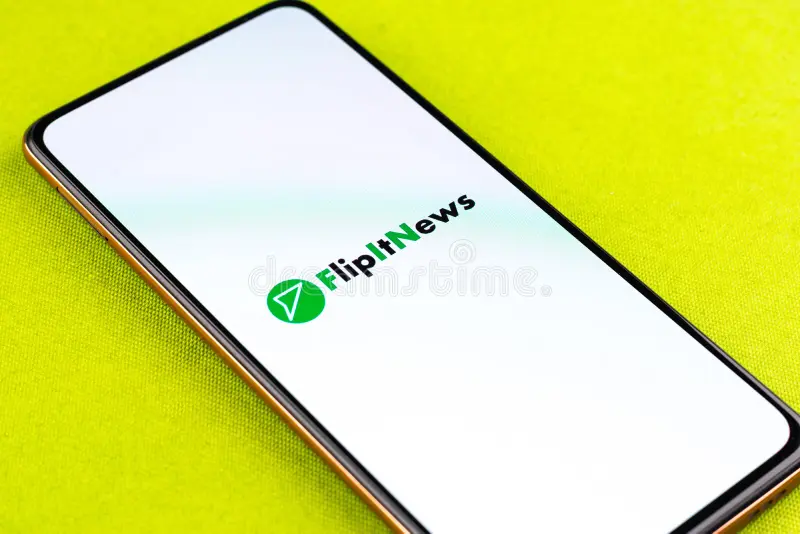

### Feature Information:

- **Article**

- **Category**

The features names are themselves pretty self-explanatory.

# 1. Importing the libraries & Reading the data file:

To explore and analyse the data let's import the following required libraries and load the dataset and save it to a dataframe 'df'.

In [29]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


import re
import regex
from nltk import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Loading the dataset
df = pd.read_csv("flipitnews-data.csv")
df.head(10)

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...
5,Politics,howard hits back at mongrel jibe michael howar...
6,Politics,blair prepares to name poll date tony blair is...
7,Sports,henman hopes ended in dubai third seed tim hen...
8,Sports,wilkinson fit to face edinburgh england captai...
9,Entertainment,last star wars not for children the sixth an...


# 2. Exploring the dataset:

In [3]:
# Getting the shape of the Dataset
df.shape

(2225, 2)

In [4]:
# Total number of aews articles
df['Category'].nunique()

5

In [5]:
# Getting the categories of news articles
df['Category'].unique()

array(['Technology', 'Business', 'Sports', 'Entertainment', 'Politics'],
      dtype=object)

In [6]:
# Number of news articles per category
df['Category'].value_counts()

Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64

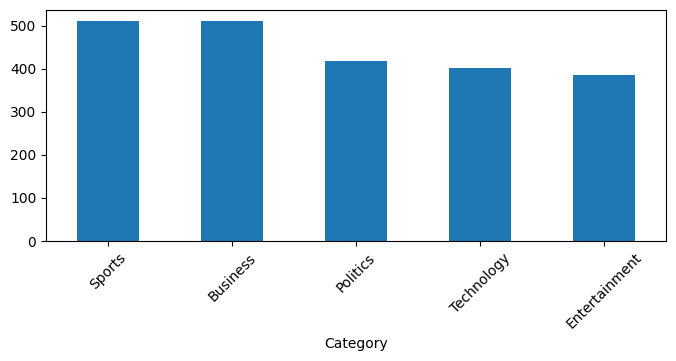

In [7]:
# number of news articles per Category

plt.figure(figsize=(8,3))
df['Category'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

- There are total **5 types of articles** present in the dataset.
- Most of the news articles are from **Sports and Business** category.
- Only **401 no. of articles belong to the ‘Technology’ category.**

# 3. Processing the Textual Data(the news articles):

In [8]:
# Removing the non-letters

import re

def remove_non_letters(text):
    # Keep only letters and replace everything else with a space
    return re.sub("[^a-zA-Z]", " ", text)

df['Article'] = df['Article'].apply(lambda x: remove_non_letters(x))

In [9]:
# Lowering the Text

df['Article'] = df['Article'].str.lower()

In [10]:
# Tokenization

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt_tab')


# Corpus of the entire Document
corpus = df['Article'].str.cat(sep=' ')

# Tokenize corpus into words
tokens = word_tokenize(corpus)

# Total word count
print('Number of words in the entire corpus:', len(tokens))

# Unique word count
unique_tokens = set(tokens)
print('Number of words in the vocabulary:', len(unique_tokens))

# Unique characters (optional)
unique_chars = set(corpus)
# print('Unique characters used in corpus:', unique_chars)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Piya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Number of words in the entire corpus: 859619
Number of words in the vocabulary: 27905


In [11]:
# Removing stopwords

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load stopwords once
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)  # Better tokenization
    clean_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(clean_tokens)

# Apply to the 'Article' column
df['Article'] = df['Article'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Piya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Removing Punctuations

import string

def remove_punctuation(text):
    cleantext = ''.join([i for i in text if i not in string.punctuation])
    return cleantext

df['Article'] = df['Article'].apply(remove_punctuation)

In [13]:
# Lemmatization

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')  # Optional but recommended

wl = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized = [wl.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized)

df['Article'] = df['Article'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Piya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Piya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Piya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
print(df[['Category', 'Article']].head())

        Category                                            Article
0     Technology  tv future hand viewer home theatre system plas...
1       Business  worldcom bos left book alone former worldcom b...
2         Sports  tiger wary farrell gamble leicester say rushed...
3         Sports  yeading face newcastle fa cup premiership side...
4  Entertainment  ocean twelve raid box office ocean twelve crim...


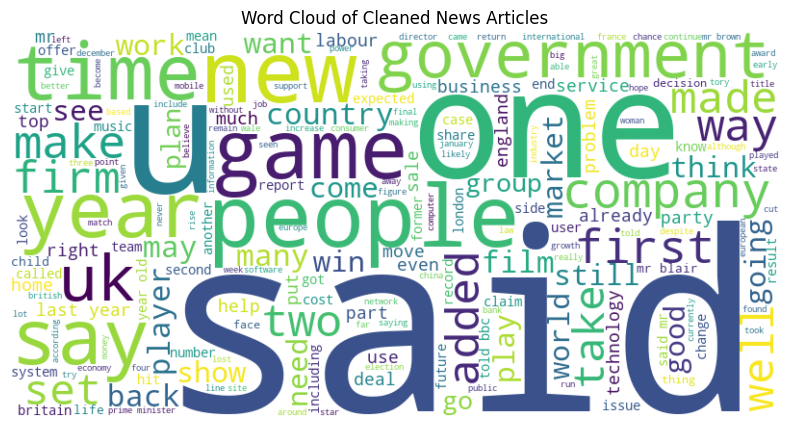

In [15]:
# Creating a WordCloud

from wordcloud import WordCloud

# Combine all articles into one string
text_corpus = ' '.join(df['Article'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned News Articles')
plt.show()

- The word cloud shows the most frequent words in the news articles. 
- Common terms like "said," "year," "people," "government," "UK," "game" suggest popular topics such as politics, business, sports, and technology. 
- Words like "said," "added" reflect a reporting style. 
- It gives a quick overview of the key themes in the dataset.

# 4. Encoding and Transforming the Data:

In [16]:
# Encoding the Target Variable

le = LabelEncoder()
df['Category_id'] = le.fit_transform(df['Category'])
df.head()     

,Category,Article,Category_id
0,Technology,tv future hand viewer home theatre system plas...,4
1,Business,worldcom bos left book alone former worldcom b...,0
2,Sports,tiger wary farrell gamble leicester say rushed...,3
3,Sports,yeading face newcastle fa cup premiership side...,3
4,Entertainment,ocean twelve raid box office ocean twelve crim...,1


In [17]:
# Bag Of Words(Count Vectorizer)

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bow = cv.fit_transform(df['Article'])

print("\nVocabulary (first 10 items):")
vocab_items = list(cv.vocabulary_.items())[:10]
for word, index in vocab_items:
    print(f"{word}: {index}")

# Display the shape of BoW matrix
print("Bag of Words matrix shape:", bow.toarray().shape)

# Optional: print entire BoW matrix (may be huge!)
print("Bag of Words matrix (dense representation):")
print(bow.toarray())

# To see word frequencies across the corpus (sum by column)
word_freq = bow.toarray().sum(axis=0)

# Print frequency for first 10 vocabulary words
for word, idx in vocab_items:
    print(f"'{word}' frequency in corpus: {word_freq[idx]}")



Vocabulary (first 10 items):
tv: 22819
future: 8828
hand: 9762
viewer: 23650
home: 10331
theatre: 22114
system: 21720
plasma: 16588
high: 10179
definition: 5614
Bag of Words matrix shape: (2225, 24728)
Bag of Words matrix (dense representation):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
'tv' frequency in corpus: 544
'future' frequency in corpus: 384
'hand' frequency in corpus: 213
'viewer' frequency in corpus: 102
'home' frequency in corpus: 746
'theatre' frequency in corpus: 99
'system' frequency in corpus: 552
'plasma' frequency in corpus: 14
'high' frequency in corpus: 579
'definition' frequency in corpus: 101


In [18]:
# TF-IDF (Term Frequency-Inverse Document Frequency)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
TFIDF = tfidf.fit_transform(df['Article'])

print("\nVocabulary (first 10 items):")
vocab_items = list(tfidf.vocabulary_.items())[:10]
for word, index in vocab_items:
    print(f"{word}: {index}")

print("TF-IDF matrix shape:", TFIDF.shape)

# Optional: print full dense TF-IDF matrix (can be large)
print("TF-IDF matrix (dense representation):")
print(TFIDF.toarray())


Vocabulary (first 10 items):
tv: 22819
future: 8828
hand: 9762
viewer: 23650
home: 10331
theatre: 22114
system: 21720
plasma: 16588
high: 10179
definition: 5614
TF-IDF matrix shape: (2225, 24728)
TF-IDF matrix (dense representation):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
# Split data

X = df['Article']
y = df['Category']

# Split dataset (75% train, 25% test), with stratify to keep category distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1668,) (557,) (1668,) (557,)


# 5. Model Training & Evaluation:

In [20]:
# Confusion matrix plotting function

def plot_conf_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# 5.1. Simple Techniques:

### 5.1.1. Naive Bayes - MultinomialNB

- It is a Probabilistic classifier based on Bayes’ Theorem.

- Assumes features are conditionally independent given the class label. Calculates the posterior probability for each class.

- Common types: GaussianNB, MultinomialNB (for text), BernoulliNB.

- Advantages:

    - Extremely fast and simple.

    - Works well with high-dimensional data.

    - Performs especially well on text classification tasks.

Naive Bayes Accuracy: 0.9712746858168761
               precision    recall  f1-score   support

     Business       0.97      0.96      0.97       136
Entertainment       1.00      0.93      0.96        96
     Politics       0.93      0.99      0.96        98
       Sports       0.98      1.00      0.99       124
   Technology       0.97      0.97      0.97       103

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557



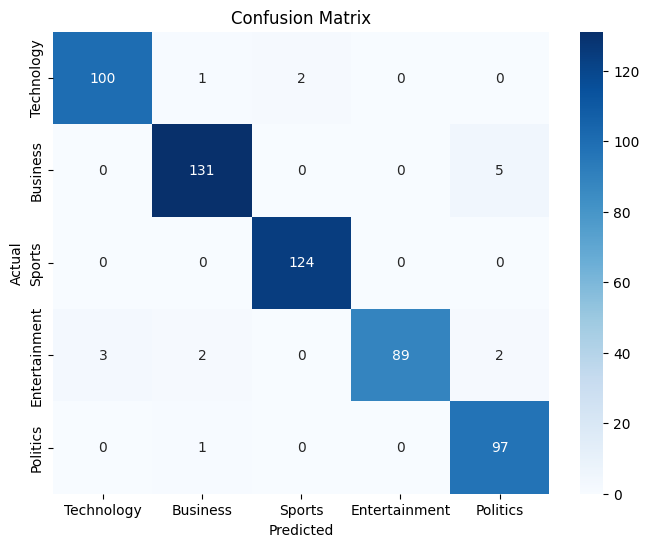

Prediction for complaint1: ['Business']
Prediction for complaint2: ['Technology']


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer


# Build pipeline
nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Train
nb.fit(X_train, y_train)

# Predict
y_pred = nb.predict(X_test)

# Accuracy & Report
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

labels = y.unique()
plot_conf_matrix(y_test, y_pred, labels)

# Example predictions on new samples
complaint1 = "games maker fights for survival one of britain s largest independent game makers..."
print("Prediction for complaint1:", nb.predict([complaint1]))

complaint2 = "tv future in the hands of viewers with home theatre systems plasma high-definition tvs..."
print("Prediction for complaint2:", nb.predict([complaint2]))


### 5.1.2. Logistic Regression

- It is a Linear, probabilistic model used for classification tasks.

- Estimates the probability that a given input belongs to a particular class using the logistic (sigmoid) function.

- Best for binary classification but extendable to multiclass (using One-vs-Rest or Softmax).

- Advantages:

    - Interpretable coefficients.

    - Performs well on linearly separable data.

    - Efficient and fast to train.

accuracy 0.9694793536804309
               precision    recall  f1-score   support

     Business       0.98      0.93      0.96       136
Entertainment       0.96      0.97      0.96        96
     Politics       0.93      0.99      0.96        98
       Sports       0.98      0.98      0.98       124
   Technology       0.98      0.99      0.99       103

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557



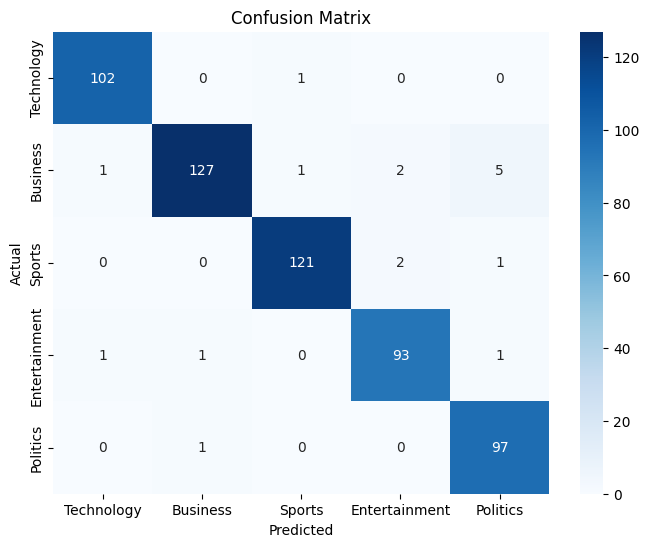

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5, max_iter=1000)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Accuracy & Report
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

labels = y.unique()
plot_conf_matrix(y_test, y_pred, labels)

### 5.1.3. SGDClassifier(Stochastic Gradient Descent Classifier)

- It is a Linear model trained using stochastic gradient descent.

- Optimizes a loss function (e.g., hinge for SVM, log for logistic regression) using mini-batches.

- Suitable for very large datasets or online learning.

- Advantages:

    - Highly scalable.

    - Supports a variety of loss functions.

    - Works well with sparse data like text (after vectorization).

accuracy 0.9712746858168761
               precision    recall  f1-score   support

     Business       0.96      0.94      0.95       136
Entertainment       1.00      0.96      0.98        96
     Politics       0.93      0.98      0.96        98
       Sports       0.98      1.00      0.99       124
   Technology       0.99      0.98      0.99       103

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557



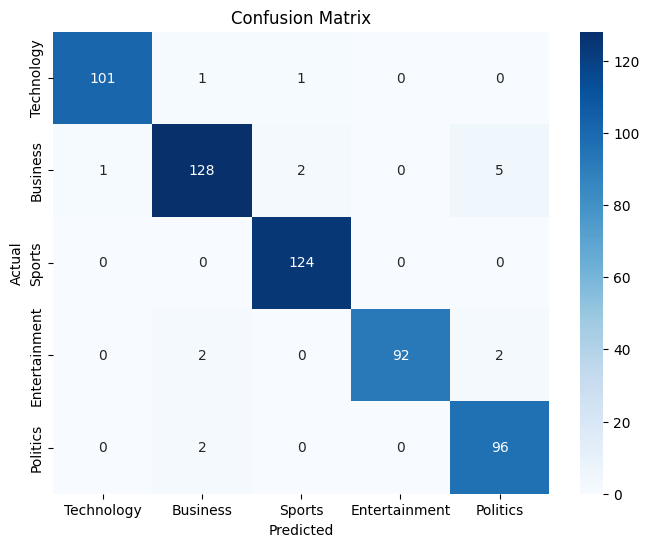

In [23]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)


# Accuracy & Report
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

labels = y.unique()
plot_conf_matrix(y_test, y_pred, labels)

- Out of the above three models Logistic Regression is working better.

# 5.2. Advanced Techniques:

In [24]:
# Split data

X = df['Article']
y = df['Category']

# Split dataset (75% train, 25% test), with stratify to keep category distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1668,) (557,) (1668,) (557,)


### 5.2.1. Decision Tree

- Decision trees are powerful and versatile supervised learning algorithms widely used for both classification and regression tasks.

- For classification, DecisionTreeClassifier can handle:

    - Binary classification: where the target labels are typically two classes (e.g., [-1, 1] or [0, 1]).

    - Multiclass classification: where the target labels are multiple classes (e.g., [0, 1, ..., K-1]).

- Decision trees work by recursively splitting the dataset based on feature values to create a tree structure, where each internal node represents a decision rule and each leaf node represents a class label (or regression value).

- They are popular because they are:

    - Easy to interpret and visualize.

    - Capable of capturing nonlinear relationships.

    - Able to handle both numerical and categorical data.

Accuracy: 0.8491921005385996
               precision    recall  f1-score   support

     Business       0.84      0.79      0.81       128
Entertainment       0.81      0.86      0.83        97
     Politics       0.78      0.86      0.82       104
       Sports       0.96      0.91      0.94       128
   Technology       0.84      0.83      0.83       100

     accuracy                           0.85       557
    macro avg       0.85      0.85      0.85       557
 weighted avg       0.85      0.85      0.85       557



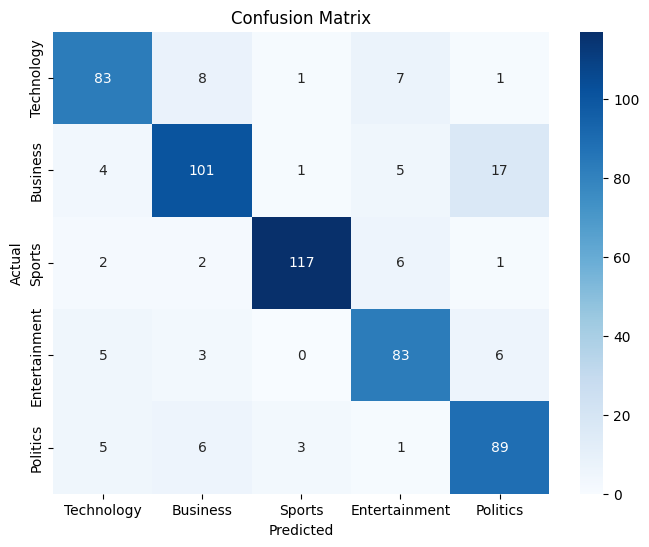

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Define the pipeline
dtc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(random_state=42)),
])

# Train the model
dtc.fit(X_train, y_train)

# Predict on test data
y_pred = dtc.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

labels = y.unique()
plot_conf_matrix(y_test, y_pred, labels)

- We can see that, the accuracy score is 84% and a lot of misclassifications are there.

### 5.2.2. Random Forest

- Random Forest is an ensemble learning method that combines multiple decision trees to improve classification (or regression) performance.

- For classification, RandomForestClassifier can handle Binary & Multiclass Classification.

- Builds several decision trees on random subsets of the data and features. Outputs the mode (majority vote) of the individual trees for classification tasks.

- Advantages:

    - More accurate and robust than a single decision tree.

    - Reduces overfitting by averaging multiple models.

    - Can handle high-dimensional data well.

    - Provides feature importance scores.

Accuracy: 0.9676840215439856
               precision    recall  f1-score   support

     Business       0.94      0.98      0.96       128
Entertainment       0.98      0.95      0.96        97
     Politics       0.98      0.95      0.97       104
       Sports       0.98      0.99      0.98       128
   Technology       0.97      0.96      0.96       100

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557



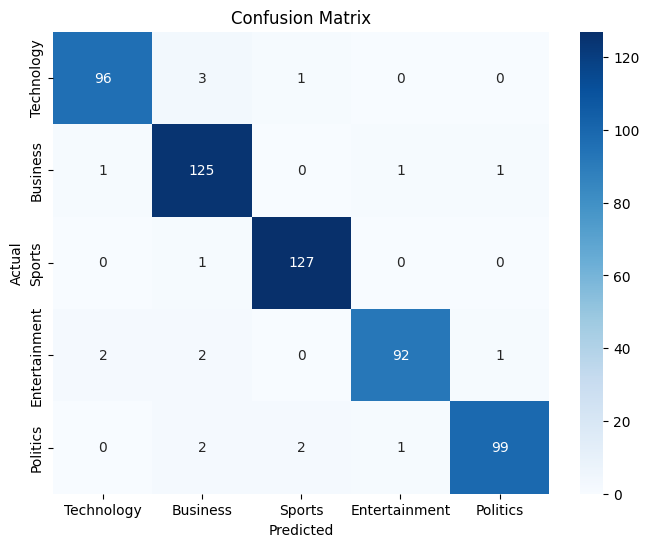

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline with Random Forest
rfc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(random_state=42)),
])

# Train the model
rfc.fit(X_train, y_train)

# Predict on test data
y_pred = rfc.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

labels = y.unique()
plot_conf_matrix(y_test, y_pred, labels)

- The accuracy score is 97% and very minor misclassifications are there.

### 5.2.3. K-Nearest Neighbors (KNN)

- K-Nearest Neighbors is a simple, instance-based learning algorithm used for both classification and regression.

- For classification, KNeighborsClassifier can handle Binary & Multiclass Classification.

- How it works:

    - Stores all training data.

    - For a given test sample, it finds the K closest training samples (neighbors) using a distance metric (e.g., Euclidean).

    - Assigns the class most common among the neighbors.

- Advantages:

    - Very intuitive and easy to implement.

    - Non-parametric — makes no assumption about the data distribution.

    - Naturally handles multi-class problems.

- Limitations:

    - Sensitive to the choice of K and distance metric.

    - Computationally expensive for large datasets.

Accuracy: 0.9425493716337523
               precision    recall  f1-score   support

     Business       0.94      0.94      0.94       128
Entertainment       0.98      0.93      0.95        97
     Politics       0.87      0.93      0.90       104
       Sports       0.98      0.97      0.98       128
   Technology       0.94      0.94      0.94       100

     accuracy                           0.94       557
    macro avg       0.94      0.94      0.94       557
 weighted avg       0.94      0.94      0.94       557



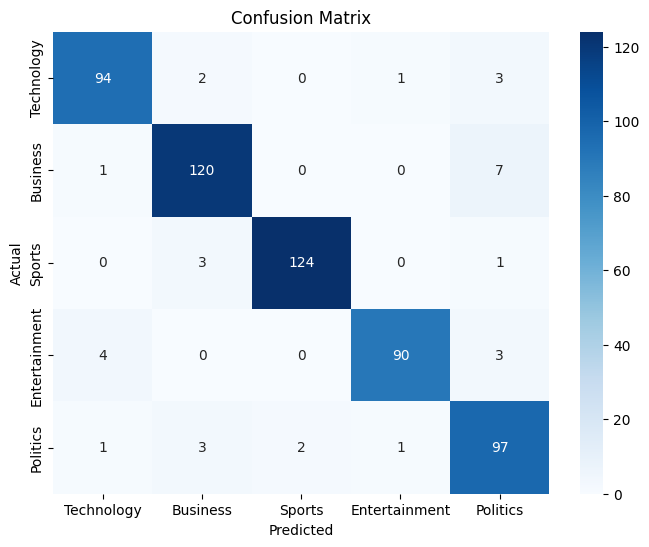

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline with KNN classifier
knn = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier()),  # default n_neighbors=5, you can tune it
])

# Train the model
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix function (assuming defined earlier)
labels = y.unique()
plot_conf_matrix(y_test, y_pred, labels)

- The accuracy score is 94% and there are still some misclassifications.

# 5.3. Functionalized Code(Optional):

Here's a functionalized version of the code that trains and evaluates Decision Tree, K-Nearest Neighbors (KNN), and Random Forest classifiers using a common pipeline.

--- Decision Tree ---
Accuracy: 0.8606741573033708
Classification Report:
                precision    recall  f1-score   support

     Business       0.89      0.83      0.86       102
Entertainment       0.83      0.83      0.83        77
     Politics       0.81      0.81      0.81        84
       Sports       0.95      0.92      0.94       102
   Technology       0.80      0.90      0.85        80

     accuracy                           0.86       445
    macro avg       0.86      0.86      0.86       445
 weighted avg       0.86      0.86      0.86       445



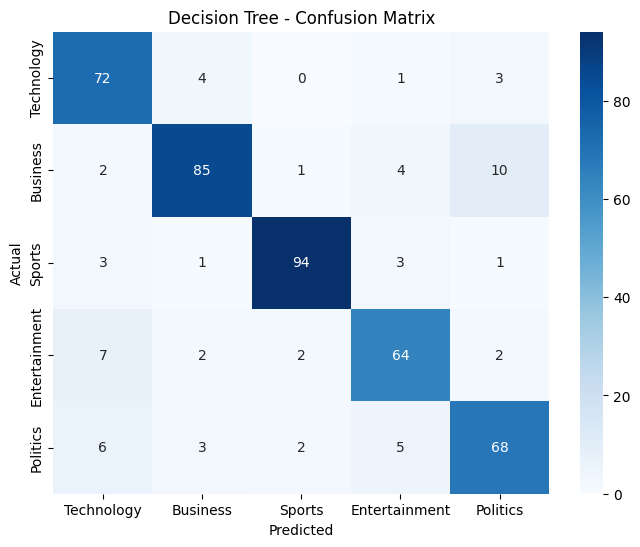



--- K-Nearest Neighbors ---
Accuracy: 0.9303370786516854
Classification Report:
                precision    recall  f1-score   support

     Business       0.93      0.91      0.92       102
Entertainment       0.96      0.91      0.93        77
     Politics       0.86      0.93      0.89        84
       Sports       0.97      0.97      0.97       102
   Technology       0.94      0.93      0.93        80

     accuracy                           0.93       445
    macro avg       0.93      0.93      0.93       445
 weighted avg       0.93      0.93      0.93       445



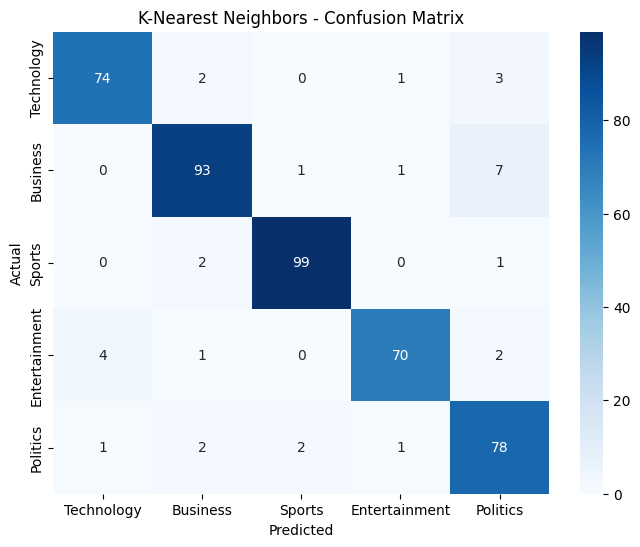



--- Random Forest ---
Accuracy: 0.9752808988764045
Classification Report:
                precision    recall  f1-score   support

     Business       0.98      0.96      0.97       102
Entertainment       0.99      1.00      0.99        77
     Politics       0.98      0.94      0.96        84
       Sports       0.98      1.00      0.99       102
   Technology       0.95      0.97      0.96        80

     accuracy                           0.98       445
    macro avg       0.97      0.98      0.97       445
 weighted avg       0.98      0.98      0.98       445



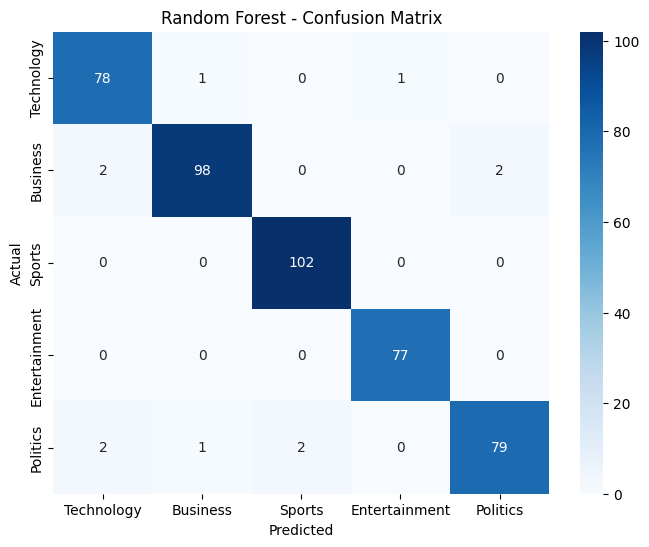

In [28]:
# Plot Confusion Matrix
def plot_conf_matrix(y_true, y_pred, labels, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# General function to train & evaluate any model
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test, labels):
    pipe = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', model),
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plot_conf_matrix(y_test, y_pred, labels=labels, title=f"{model_name} - Confusion Matrix")
    print("\n")

# Assume df is your DataFrame and has 'Article' and 'Category' columns
X = df['Article']
y = df['Category']
labels = y.unique()

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Models to evaluate
models = [
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),
    (RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")
]

# Run all models
for clf, name in models:
    train_and_evaluate_model(clf, name, X_train, X_test, y_train, y_test, labels)


- Out of the three models, in **Random Forest** model,
    - The diagonal values (correct predictions) are much higher than the off-diagonal values (misclassifications), indicating high accuracy.

    - Sports and Business classes show very strong performance with minimal errors.

    - Most misclassifications are minor and scattered, suggesting the model is well-balanced across classes.
    - Classification Report Summary:
        - Precision and recall values are consistently very high (around 0.94–0.99) for all classes.

        - The F1-score, which is the harmonic mean of precision and recall, also shows uniform strength (0.96–0.98) across all categories.

        - Macro avg and weighted avg for all three metrics are the same: 0.97.

### Best Accuracy came with Logistic Regression and Random Forest  so far > 97%.

# 6. Questionnaire:

### 6.1. How many news articles are present in the dataset that we have?

- There are total **5 types of articles** present in the dataset.

### 6.2. Most of the news articles are from _____ category.

- Most of the news articles are from **Sports and Business** category.

### 6.3. Only ___ no. of articles belong to the ‘Technology’ category.

- Only **401 no. of articles belong to the ‘Technology’ category.**

### 6.4. What are Stop Words and why should they be removed from the text data?

- Stop words are commonly used words in a language that carry little or no meaningful information when analyzing text. Examples in English include:

    - Articles: a, an, the

    - Prepositions: in, on, at, by

    - Conjunctions: and, or, but

    - Pronouns: he, she, it, they

    - Others: is, are, was, be, to, of, for
- Removing stop words helps in focusing on the meaningful content of a text. Here’s why it's beneficial:

    - Reduces Noise
        - Stop words don’t add much value to understanding the core meaning of the text, so removing them reduces irrelevant information.

    - Improves Algorithm Efficiency
        - Less data means faster processing and reduced memory usage — especially important in large corpora or real-time applications.

    - Enhances Model Performance
        - Models like TF-IDF, bag-of-words, or word embeddings become more effective when stop words are excluded, as they can better capture the important features and terms.

    - Reduces Vocabulary Size
        - This helps in dimensionality reduction, improving generalization and speeding up training in NLP models.
- In tasks like sentiment analysis, machine translation, or question answering, some stop words (like not or never) carry critical meaning. Always evaluate the context before removing them.

### 6.5. What is the difference between Stemming and Lemmatization?

- Stemming and Lemmatization are both techniques used to reduce words to their root form, but they differ in approach and accuracy.

- Stemming cuts off prefixes or suffixes to get the root form, often resulting in non-real words. For example, "studies" may become "studi". It is fast but less accurate.

- Lemmatization uses vocabulary and grammar rules to return the dictionary form of a word. For example, "studies" becomes "study". It is more accurate but slower than stemming.

- In short, stemming is quicker and rougher, while lemmatization is smarter and cleaner.

### 6.6. Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?

- TF-IDF (Term Frequency–Inverse Document Frequency) is generally considered more efficient and informative than Bag of Words (BoW) for most NLP tasks.

- Here's Why:
    - Bag of Words (BoW) only counts how often each word appears in a document. It ignores the importance of the word across all documents.

    - TF-IDF not only counts word frequency but also reduces the weight of common words and emphasizes rare but meaningful terms. This helps in capturing more relevant features and reduces noise.

### 6.7. What’s the shape of train & test data sets after performing a 75:25 split?

- The shapes of X_train, y_train, X_test and y_test after splitting are (1668,) (557,) (1668,) (557,) respectively.

### 6.8. Which of the following is found to be the best performing model?
   - a. Random Forest 
   - b. Nearest Neighbors 
   - c. Naive Bayes

- **Random Forest model is found to be the best performing model and the acuracy score is > 97%.**

### 6.9. According to this particular use case, both precision and recall are equally important? (T/F)

- Precision ensures that the predictions made are correct (low false positives).

- Recall ensures that all actual instances are identified (low false negatives).

- Since all class metrics are balanced and F1-scores are high, it suggests that:

    - Neither false positives nor false negatives dominate the problem.

    - The model is required to both correctly identify and comprehensively capture each class — a clear sign that precision and recall are equally important.